### 감성분석
1. 사전기반 - KNU 감성사전 등 (등록되어 있는 감정 점수를 매핑하는 방식으로 감정 점수를 계산)
2. 머신러닝 - 학습하여 활용(분석) -> 가중치 분석 (주의사항 : 학습할 데이터셋)
3. 딥러닝 - 이미 학습되어 있는 모델(사전 학습 모델)을 그냥/FineTuning 하여 활용 - 고성능의 자원(GPU)을 필요로 함

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/딥러닝 기초 25.07.11 (class 2)

/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("./data/naver_shopping.txt", delimiter = "\t", header = None)

In [ ]:
# 컬럼명 변경
data.columns = ["평점", "리뷰"]

In [ ]:
text = data["리뷰"]

In [ ]:
text

,리뷰
0,배공빠르고 굿
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,보폴이 계속 때처럼 나오다가 지금은 안나네요~


## 1. 정제
- 1.1 결측치 확인
- 1.2 특수문자 제거

In [ ]:
data.info() # 결측치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   평점      200000 non-null  int64 
 1   리뷰      200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
# 특수문자 제거를 위한 패턴 정의
import re

pattern = r"[^a-zA-Z0-9가-힣\s.?!]"

In [ ]:
re.sub(pattern, "", "ㅋㅋㅋㅋ 나의 가계부 지출 년 월 생활비 정산 만원 등등")

' 나의 가계부 지출 년 월 생활비 정산 만원 등등'

In [ ]:
from tqdm.auto import tqdm

In [ ]:
new_doc = [ re.sub(pattern, "", doc) for doc in tqdm(text) ]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [ ]:
# 정제 된 텍스트 추가
data["cleaned_doc"] = new_doc

In [ ]:
data.head(3)

,평점,리뷰,cleaned_doc
0,5,배공빠르고 굿,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...


## 2. 형태소 분리
- 2.1 형태소 분리, 어간 추출, 정규화, 원하는 품사만 추출, 띄어쓰기 교정, 불용어 제거

In [ ]:
!pip -q install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.4 MB/s eta 0:00:00


In [ ]:
!pip -q install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 27.3 MB/s eta 0:00:00


In [ ]:
# 불용어 사전 로드
from kiwipiepy.utils import Stopwords

stopwords = Stopwords()

stopwords_list = [ word for word, tag in stopwords.stopwords ]

In [ ]:
stopwords_list

['다고',
 '원',
 '주',
 '와',
 '며',
 '일',
 '년',
 '는',
 '지',
 '면서',
 'ᆫ',
 '에서',
 '사람',
 '그',
 '이',
 '라',
 '어',
 '와',
 '가',
 '대하',
 '게',
 '명',
 '한',
 '위하',
 '우리',
 '었',
 '따르',
 '어서',
 '일',
 '다는',
 '다',
 'ᆫ',
 'ᆫ다',
 '과',
 '때문',
 '겠',
 '까지',
 '수',
 '하',
 '더',
 '때',
 '아니',
 '로',
 '같',
 '없',
 '있',
 '라는',
 '이',
 '도',
 '에게',
 '어',
 '이',
 '것',
 '면',
 '은',
 '보',
 '만',
 '이',
 '을',
 '고',
 '제',
 '하',
 '성',
 'ᆯ',
 '고',
 '있',
 '이',
 '중',
 '지역',
 '과',
 '어야',
 '를',
 '않',
 '그',
 '말',
 '으로',
 '지',
 '들',
 '나',
 '받',
 '적',
 '되',
 '는',
 '의',
 '지만',
 '하',
 '월',
 '에',
 '통하',
 '되',
 '던',
 '다',
 '만',
 '부터',
 '화',
 '등',
 '기',
 '을',
 '하',
 '은']

In [ ]:
# 띄어쓰기 교정용 도구, 형태소 분석기
from kiwipiepy import Kiwi
from konlpy.tag import Okt

In [ ]:
# 초기화
okt = Okt()
kiwi = Kiwi() # 띄어쓰기 교정용

In [ ]:
okt.tagset
# Noun, Verb, Adjective
# 데이터셋, 목적 등에 따라서 품사 선택이 달라질 수 있음

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
# 사용자 함수 정의
def pos_tagging(text) :
    # 띄어쓰기 교정
    text = kiwi.space(text)

    # 품사태깅
    pos_words = okt.pos(text, stem = True, norm = True)

    tagged_list = []
    # 원하는 품사 추출
    for word, tag in pos_words :
        if tag in ["Noun", "Verb", "Adjective"] : # 명사, 동사, 형용사 인가?
            if word not in stopwords_list :       # 불용어 사전에 등록되어있지 않은가?
                tagged_list.append(word)

    return tagged_list

In [ ]:
pos_tagging(data["cleaned_doc"][0])

['배공', '빠르다', '굿']

In [ ]:
# 작업 진행
tagged_doc = [ pos_tagging(text) for text in tqdm(data["cleaned_doc"]) ]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [ ]:
# 추가
data["tagged_doc"] = tagged_doc

In [ ]:
data

,평점,리뷰,cleaned_doc,tagged_doc
0,5,배공빠르고 굿,배공빠르고 굿,"[배공, 빠르다, 굿]"
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,"[택배, 엉망, 용, 저희, 집, 밑, 층, 놔두다, 가다]"
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,"[아주, 좋다, 바지, 정말, 좋다, 개, 구매, 하다, 가격, 대박, 이다, 바느..."
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,"[선물, 용, 받다, 전달, 하다, 하다, 상품, 이다, 머, 컵, 오다, 당황, ..."
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요,"[민트, 색상, 예쁘다, 옆, 손잡이, 거, 용, 도로, 사용, 되다]"
...,...,...,...,...
199995,2,장마라그런가!!! 달지않아요,장마라그런가!!! 달지않아요,"[장마, 런가, 달, 않다]"
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,"[다이슨, 케이스, 구매, 하다, 다이슨, 슈퍼소닉, 드라이기, 케이스, 구매, 하..."
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,로드샾에서 사는것보다 세배 저렴하네요 자주이용할께요,"[로드샾, 살다, 세배, 저렴하다, 자주, 이용, 하다]"
199998,5,넘이쁘고 쎄련되보이네요~,넘이쁘고 쎄련되보이네요,"[넘다, 이쁘다, 쎄다, 되다, 보이다]"


In [ ]:
# 저장
import pickle

with open("./data/naver_shopping(정제 및 토큰화 완료).pkl", "wb") as f :
    pickle.dump(data, f)

## 정제 및 토큰화 완료!
- 다음 실습부터는 아래 셀부터 실행

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/딥러닝 기초 25.07.11 (class 2)

/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)


In [3]:
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip -q install --upgrade gensim
# gensim : 자연어처리 영역에 필요한 도구들

# 세션 다시 시작 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [3]:
!pip -q install kiwipiepy
!pip -q install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 32.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import pickle
import re
from kiwipiepy import Kiwi
from konlpy.tag import Okt
from kiwipiepy.utils import Stopwords
from tqdm.auto import tqdm

In [5]:
with open("./data/naver_shopping(정제 및 토큰화 완료).pkl", "rb") as f :
    data = pickle.load(f)

### Word2Vec
- 단어 임베딩 방법론(모델) 중에 하나
- `단어의 관계성`을 학습하기 위한 모델

> 두 가지 방법
> - CBOW : 주변 단어 → 중심 단어를 학습/예측하는 방법
> - Skip-gram : 중심 단어 → 주변 단어를 학습/예측하는 방법

### 유사도(similarity)?
- 비슷한 정도를 숫자값으로 표현한 형태

1. 유클리디안 거리
2. 코사인 유사도

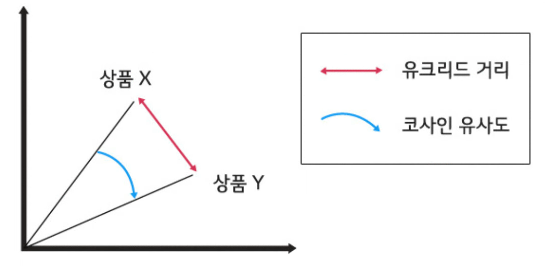

In [ ]:
# word2vec 맛보기
import gensim.downloader as api

| 모델 이름                           | 레코드 수      | 설명                                                                                                  |
|-------------------------------------|----------------|-------------------------------------------------------------------------------------------------------|
| conceptnet-numberbatch-17-06-300    | 1,917,247      | ConceptNet Numberbatch는 개념 간의 관계를 학습한 모델.                                                 |
|                                     |                | 상식을 이해하고 개념 간 관계를 연결시키기 위해 개발됨.                                                 |
|                                     |                | 주로 의미 네트워크 연구에 사용됨. "고양이"와 "동물" 간의 관계를 학습.                                  |
| fasttext-wiki-news-subwords-300     | 999,999        | fastText는 단어뿐만 아니라 서브워드(단어의 작은 부분)를 학습.                                          |
|                                     |                | "unbelievable"을 "un", "believe", "able"로 나누어 학습.                                                 |
|                                     |                | Wikipedia와 뉴스 기사 데이터를 기반으로 학습됨.                                                       |
| glove-twitter-100                   | 1,193,514      | GloVe는 Stanford에서 개발된 모델로, 단어 간의 공간적 관계를 벡터로 표현.                               |
|                                     |                | 트위터 데이터(2억 개 트윗)로 학습되어 소셜 미디어 자연어 처리 작업에 적합.                             |
| word2vec-google-news-300            | 3,000,000      | Word2Vec은 구글 뉴스 데이터로 학습된 모델.                                                             |
|                                     |                | 뉴스 기사의 단어 간 유사성 및 의미적 관계를 잘 포착.                                                   |
|                                     |                | 뉴스 데이터 기반이기 때문에 자연어 처리에 많이 사용됨.                                                 |
| word2vec-ruscorpora-300             | 184,973        | Word2Vec ruscorpora는 러시아어 텍스트 기반의 모델로,                                                   |
|                                     |                | 러시아어 자연어 처리 작업에 사용됨.                                                                   |

In [ ]:
# 사전학습 된 word2vec 모델 로드
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# 임베딩 벡터 확인
model["cat"].shape

(300,)

In [ ]:
# 유사도 계산
model.most_similar("cat")

# 유사도 값 : -1 ~ 1
# 비슷한 의미일수록 1에 가까워짐 (-1에 가까울수록 의미가 전혀 다름)

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [ ]:
# 벡터 간의 유사도를 계산 후, 가장 유사한 단어들을 반환하는 함수
model.most_similar_cosmul(positive = ["soju", "russia"], negative = ["korea"])

[('vodka', 0.8616750240325928),
 ('brandy', 0.8266340494155884),
 ('distilled_liquor', 0.8266003727912903),
 ('Ochakovo', 0.8215005397796631),
 ('Campari', 0.8179371953010559),
 ('brandy_cognac', 0.8096943497657776),
 ('Bombay_Sapphire_gin', 0.8087176084518433),
 ('plum_brandy', 0.8080827593803406),
 ('Spanish_cava', 0.8054169416427612),
 ('whiskey_brandy', 0.8039817214012146)]

### Word2Vec 학습
- 보통 Skipgram + Negative Sampling 방식이 좀 더 임베딩 품질이 좋음

In [6]:
from gensim.models import Word2Vec # 학습 안되어있음

In [7]:
# 초기화 및 단어의 관계성 파악
w2v = Word2Vec(
    window = 3,        # 중심단어로부터 주변단어로 인식할 크기
    min_count = 5,     # 최소 등장 횟수(5회 미만 단어는 제외)
    sg = 1,            # 0은 CBOW, 1은 SkipGram
    vector_size = 100, # 표현할 벡터의 size 지정
    negative = 5,      # 5개의 단어를 음성 샘플링에 활용 (음성인 정보를 전달)
    sentences = data["tagged_doc"] # 학습에 사용될 데이터셋
)

In [8]:
# 임베딩 벡터 확인
w2v.wv.get_vector("배송").shape

(100,)

In [9]:
w2v.wv.most_similar("별로", topn = 10)

[('별루', 0.7847347259521484),
 ('루', 0.7771662473678589),
 ('벼로', 0.6828235387802124),
 ('꽝', 0.6813016533851624),
 ('그닥', 0.6785913109779358),
 ('의견', 0.6417206525802612),
 ('별롭니', 0.6408228874206543),
 ('이상하', 0.6282016634941101),
 ('비추다', 0.6250743865966797),
 ('구림', 0.6216611862182617)]

## 평점을 기반으로 긍/부정 분류기 + 가중치 분석


1. 평점으로 라벨 생성(4,5 는 긍정 / 1,2 는 부정)

In [10]:
label = []
for rating in data["평점"] :
    if rating > 3 : # 3보다 큰가?
        label.append(1) # 긍정
    else :
        label.append(0) # 부정

In [11]:
data["label"] = label

In [12]:
data.head(3)

,평점,리뷰,cleaned_doc,tagged_doc,label
0,5,배공빠르고 굿,배공빠르고 굿,"[배공, 빠르다, 굿]",1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,"[택배, 엉망, 용, 저희, 집, 밑, 층, 놔두다, 가다]",0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,"[아주, 좋다, 바지, 정말, 좋다, 개, 구매, 하다, 가격, 대박, 이다, 바느...",1



2. 각 리뷰들에 대해 평균 벡터


In [13]:
# 각 리뷰의 평균 벡터(문서에 대한 벡터) 담아둘 리스트
X_w2v_list = []

In [14]:
import numpy as np

In [15]:
w2v.vector_size

100

In [16]:
for doc in data["tagged_doc"] :

    doc_vectors = []

    for token in doc : # 리뷰에 토큰들을 순회
        if token in w2v.wv :
            doc_vectors.append(w2v.wv[token]) # 벡터화

    if len(doc_vectors) > 0 : # 벡터의 길이값이 0보다 큰가?
        avg_vectors = np.mean(doc_vectors, axis = 0) # 평균 벡터로 만듬(문서에 대한 대표격에 벡터)
    else : # 벡터의 길이가 없는경우 → 정제하는 과정에서 삭제되는 경우
        avg_vectors = np.zeros(w2v.vector_size)

    X_w2v_list.append(avg_vectors)

In [17]:
X_w2v_list[0].shape

(100,)

3. 모델링


In [18]:
# 리스트를 2차원 array 형변환
X_w2v = np.vstack(X_w2v_list)

In [19]:
X_w2v.shape
# 20만개 데이터
# 100개의 특성(차원)

(200000, 100)

In [20]:
# 로지스틱 모델링
from sklearn.linear_model import LogisticRegression

# 초기화
logi = LogisticRegression(max_iter = 10000, random_state = 2025)

# 학습
logi.fit(X_w2v, data["label"])

LogisticRegression(max_iter=10000, random_state=2025)

4. 가중치 시각화

In [25]:
coef_vector = logi.coef_[0] # 로지스틱 모델의 계수(w)

## 감정 기여도 계산하기
- 각 단어들이 감성분류에 얼마나 기여하는지를 수치로 표현
    > 내적 계산(Dot Product) 활용

In [29]:
# 집합(set)
word_set = set()

# 데이터 내에서 등장하는 단어들을 집합 생성
for tokens in data["tagged_doc"] :
    for token in tokens :
        if token in w2v.wv :
            word_set.add(token)

In [30]:
word_set # set - 중복없음

# 각 단어의 임베딩 벡터, 모델의 가중치 벡터 → 내적 계산(정보와 정보를 합침) → 감성기여도 표현

{'주소지',
 '수기',
 '입산',
 '대표',
 '은진',
 '속지',
 '싫어지다',
 '수요',
 '서해',
 '중국산',
 '마르고',
 '오일',
 '빡셈',
 '붕붕',
 '수확',
 '혼합',
 '강츄',
 '토시',
 '역쉬',
 '통수',
 '두절',
 '오냐',
 '뚫리다',
 '항의',
 '왕',
 '호주',
 '흐려지다',
 '용량',
 '안전하다',
 '패기',
 '아쉬움',
 '널',
 '명란',
 '페인팅',
 '납작하다',
 '애쉬',
 '낮다',
 '앙금',
 '뷰',
 '의료',
 '순간',
 '줄자',
 '항균',
 '걸쇠',
 '기지',
 '물결',
 '나발',
 '닭볶음탕',
 '미끄러지다',
 '옥상',
 '필로',
 '밥상',
 '팅',
 '읽히다',
 '짬',
 '국자',
 '쩔다',
 '좋아하다',
 '녜',
 '기름기',
 '그늘',
 '두시',
 '만들기',
 '빌어',
 '시켯',
 '밀리',
 '다섯',
 '붙힌',
 '관련',
 '느',
 '쪼금씩',
 '발포',
 '랄',
 '무광',
 '파워',
 '리턴',
 '불편',
 '분',
 '엔진',
 '스트레스',
 '의미',
 '쫄바',
 '존예',
 '팔면',
 '소독',
 '싼타페',
 '솔리드',
 '현실',
 '짓누르다',
 '커터',
 '추워지다',
 '수많다',
 '잡음',
 '거실',
 '녹차',
 '스타즈',
 '촌스럽다',
 '마모',
 '복원',
 '메론',
 '연수',
 '절구',
 '임부복',
 '단',
 '구심',
 '구찌',
 '스며들다',
 '지느러미',
 '수직',
 '최',
 '브레이크',
 '전화하다',
 '들어서다',
 '뷰티',
 '앞뒤',
 '하겟',
 '살렵니',
 '주르륵',
 '줄기',
 '얼리다',
 '쓸개',
 '완도',
 '자제',
 '신고',
 '가능성',
 '예비',
 '데쉬',
 '자스민',
 '몇몇',
 '열정',
 '성능',
 '향수',
 '배트',
 '손맛',
 '불',
 '기침',
 '립',
 

In [35]:
# Test - 긍정적인 단어와 부정적인 단어 기반으로 테스트

sample_words = ["깔끔하다", "실망"]

for word in sample_words :
    embedding_vector = w2v.wv[word] # 임베딩 벡터 추출
    dot_product = np.dot(embedding_vector, coef_vector)
    print(f"{word} : {dot_product:.4f}")

# 긍정 1, 부정 0 → 라벨을 예측하기 위해 모델의 가중치가 조정되어 있음 → coef_vector
# 단어의 임베딩 벡터에 coef_vector를 내적계산 → 정보와 정보를 더함
# 양수에 가까울수록 1(긍정),  음수에 가까울수록 0(부정)

깔끔하다 : 10.9173
실망 : -14.2010


In [36]:
# 모든 단어에 대한 임베딩 벡터 추출 + 내적계산

# 딕셔너리
word_scores = { word:np.dot(w2v.wv[word], coef_vector) for word in word_set}

In [39]:
# 정렬
sorted_words = sorted(word_scores.items(), key = lambda x : x[1])

In [44]:
neg_words = sorted_words[:15] # 하위 단어들 15ea
pos_words = sorted_words[-15:] # 하위 단어들 15ea

In [47]:
plot_words = neg_words + pos_words

In [49]:
# 단어와 점수를 분리
words, scores = zip(*plot_words)

In [52]:
# 시각화
import matplotlib.pyplot as plt
plt.rc("font", family = "NanumGothic") # 한글 폰트
plt.rcParams["axes.unicode_minus"] = False # 마이너스 기호 표시

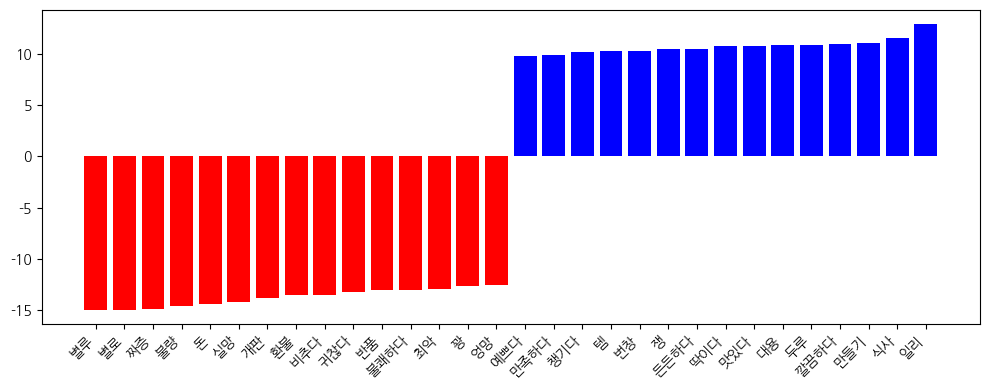

In [61]:
plt.figure(figsize = (10, 4))

# 막대 색상
bar_colors = [ "red" if s < 0 else "blue" for s in scores ]
plt.bar(range(len(words)), scores, color = bar_colors)

# Xtick 설정
plt.xticks(range(len(words)), words, rotation = 45, ha = "right")

plt.tight_layout() # 레이아웃 자동 조정
plt.show()